In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# PreProcessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,RobustScaler
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Splitting Data
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# Resampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline

# Modeling, Fitting and Evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_score, roc_auc_score, plot_roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import pickle

Buatlah EDA mengenai demografis calon karyawan dan hubungannya dengan kemungkinan mereka bekerja di perusahaan yang menyediakan training

In [2]:
df=pd.read_csv('hr-analytic.csv')

In [3]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [5]:
df.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

**Cleansing Data**

In [6]:
df['gender'].fillna(df['gender'].mode()[0],inplace=True)
df['enrolled_university'].fillna(df['enrolled_university'].mode()[0],inplace=True)
df['education_level'].fillna(df['education_level'].mode()[0],inplace=True)
df['major_discipline'].fillna(df['major_discipline'].mode()[0],inplace=True)
df['experience'].fillna(df['experience'].mode()[0],inplace=True)
df['company_size'].fillna(df['company_size'].mode()[0],inplace=True)
df['company_type'].fillna(df['company_type'].mode()[0],inplace=True)
df['last_new_job'].fillna(df['last_new_job'].mode()[0],inplace=True)

In [7]:
df.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [8]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83,0.0
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,50-99,Pvt Ltd,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,STEM,<1,500-999,Pvt Ltd,2,97,0.0


In [72]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3-q1

In [73]:
((df < (q1-1.5*IQR)) | (df > (q3+1.5*IQR))).sum()/len(df)*100

city                       0.000000
city_development_index     0.088736
company_size               0.000000
company_type               0.000000
education_level            0.000000
enrolled_university        0.000000
experience                 0.000000
gender                     0.000000
last_new_job               0.000000
major_discipline           0.000000
relevent_experience        0.000000
target                    24.934753
training_hours             5.136236
dtype: float64

Outlier masih bisa ditoleransi, karna masih dibawah 10%. sedangkan outlier di column target bisa disebabkan karena imbalance data

In [9]:
df=df.drop(['enrollee_id'],axis=1)

drop enrolle_id karna tidak diperlukan dalam analisis maupun pemilihan model

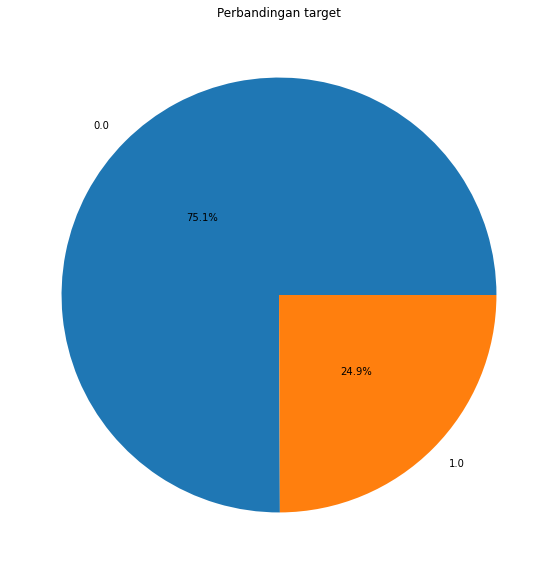

In [10]:
values = df['target'].value_counts().values.tolist()
labels = df['target'].value_counts().index
plt.figure(figsize= (10,10))
plt.title('Perbandingan target')
plt.pie(x = values, labels = labels, autopct='%1.1f%%', pctdistance= .5)
plt.show()

Dari pie chart diatas bisa disimpulkan bahwa data imbalance, sehingga masih kurang dalam mempresentasikan paramater dengan target 

* *1 : Bekerja diperusahaan training*

* *0 : tidak Bekerja di perusahaan Training*

In [11]:
df.describe()

,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000
mean,0.828848,65.366896,0.249348
std,0.123362,60.058462,0.432647
min,0.448000,1.000000,0.000000
25%,0.740000,23.000000,0.000000
50%,0.903000,47.000000,0.000000
75%,0.920000,88.000000,0.000000
max,0.949000,336.000000,1.000000


dari data diatas bisa dilihat bahwa :
* **city_development_index**:
city_development_index dari peserta yang mengikuti training adalah 0,44 dan yang paling tinggi 0.95 dan rata-rata 0.82. untuk variansi data termasuk rendah sehingga bisa disimpulkan bahwa city development index dari setiap kota peserta tidak terlalu bervariasi/peserta yang mengikuti berasal dari tingkat perkembanga kota yang hampir sama  
* **Training_hours**:
untuk training hours yang paling lama diselenggarakan adalah 336jam dan paling singkat adalah 1jam serta rata-rata training yang diselnggarakan selama 65 jam. untuk variansi data termasuk tinggi, sehingga lama penyelenggaraan training sangat berariansi

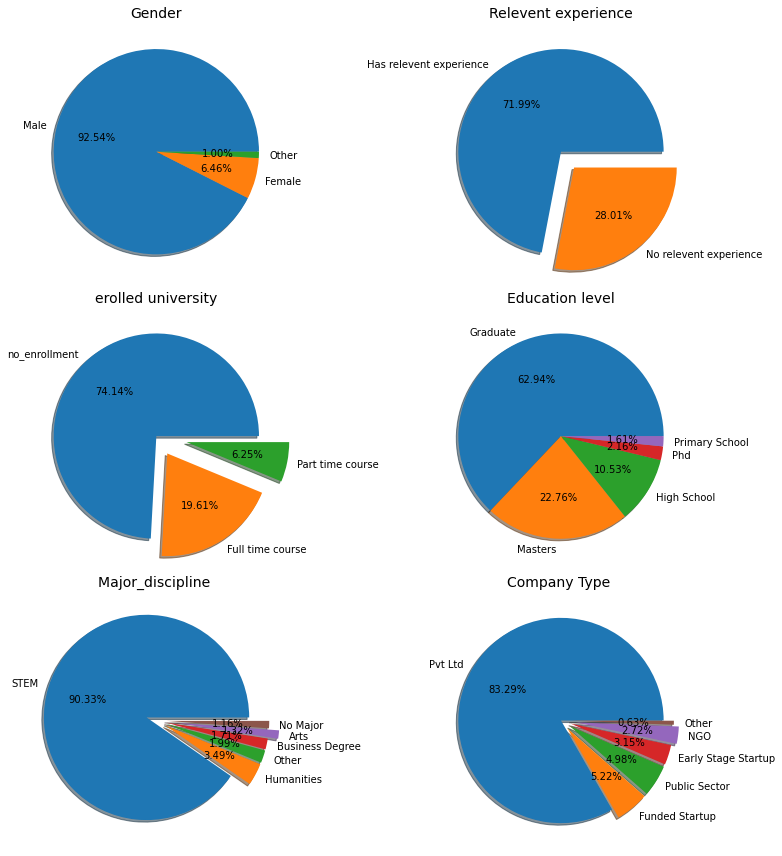

In [12]:
fig, ax = plt.subplots(3,2, figsize = (12,12))
((ax1, ax2), (ax3, ax4), (ax5, ax6)) = ax

labels = df['gender'].value_counts().index
values = df['gender'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax1.set_title("Gender", fontdict={'fontsize': 14})

labels = df['relevent_experience'].value_counts().index
values = df['relevent_experience'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.2])
ax2.set_title("Relevent experience", fontdict={'fontsize': 14})

labels = df['enrolled_university'].value_counts().index
values = df['enrolled_university'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.2,.3])
ax3.set_title("erolled university", fontdict={'fontsize': 14})

labels = df['education_level'].value_counts().index
values = df['education_level'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax4.set_title("Education level", fontdict={'fontsize': 14})

labels = df['major_discipline'].value_counts().index
values = df['major_discipline'].value_counts().tolist()
ax5.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0.1, 0.1, 0.1, 0.1, 0.2, 0.1])
ax5.set_title("Major_discipline ", fontdict={'fontsize': 14})



labels = df['company_type'].value_counts().index
values = df['company_type'].value_counts().tolist()
ax6.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.1,.1,.1, .15,.1])
ax6.set_title("Company Type ", fontdict={'fontsize': 14})

plt.tight_layout()
plt.show()


In [13]:
df.describe(exclude='number')

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,19158,19158,19158,19158,19158,19158,19158,19158,19158
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,17729,13792,14203,12058,17305,3351,9021,15957,8463


Dari tabel serta piechart diatas bisa ditarik kesimpulan bahwa :
* **City**:
Peserta berasal dari 123 kota yang berbeda, dan didominasi dari city_103
* **gender**:
peserta yang mengikuti training didominasi oleh pria
* **relevent_experience**:
Peserta yang mengikuti training didominasi oleh orang-orang yang memiliki releant experience
* **enrolled_university**:
Peserta yang mengikuti training didominasi dari no_enrollment
* **education level**:
Peserta Graduate/S1 mendominasi dalam training.
* **major_discipline**:
Jurusan yang paling banyak dalam training adalah STEM
* **experience**:
dan peserta yang mengikuti training didominasi oleh peserta yang telah memiliki pengalaman diatas 20 tahun

Dari beberapa informasi diatas bisa digunakan untuk syarat kriteria peserta training agar data antar nilai unique tidak jauh beda, misalkan (untuk peserta training dibatasi dengan kuota laki-laki 50% dn perempuan 50%)

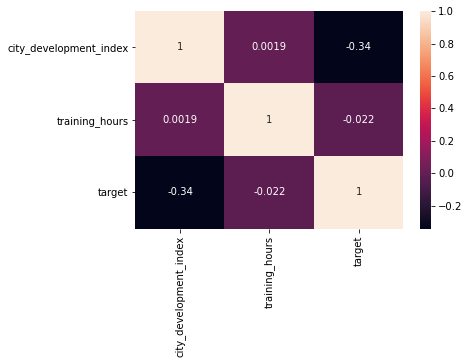

In [14]:
sns.heatmap(df.corr(), annot = True)

Dari plot diatas(hanya data yang **numeric**), bisa disimpulkan bahwa:
korelasi dari setiap data numeric rendah karna dibawah 0.4.

Namun City__development memiliki korelasi lebih tinggi dibandingkan training_hours 

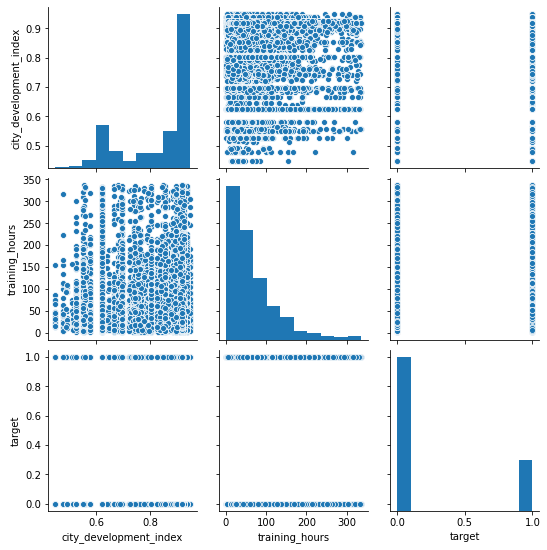

In [15]:
sns.pairplot(df[df['target']==df['target']]) #hanya untuk data numeric

Namun saat dilihat bentuk correlasinya,dari City_Development maupun training_hours tidak memiliki correlasi dengan target (tidak ada hubungan linier maupun non linier)

In [28]:
def plot_bar(column):
    # temp df 
    temp_1 = pd.DataFrame()
    # count categorical values
    temp_1['No_target'] = df[df['target'] == 0.0][column].value_counts()
    temp_1['Yes_target'] = df[df['target'] == 1.0][column].value_counts()
    temp_1.plot(kind='bar')
    plt.xlabel(f'{column}')
    plt.ylabel('Number of employee')
    plt.title('Distribution of {} and Target'.format(column))
    plt.show()

In [38]:
col_obj= list(df.select_dtypes(['object']).columns.drop(['company_size','company_type']))
col_obj

['city',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'last_new_job']

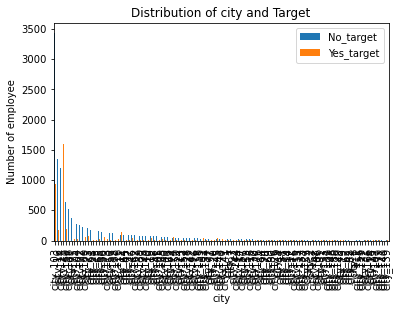

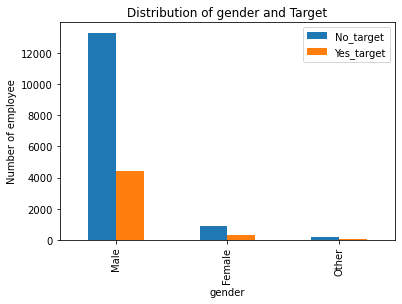

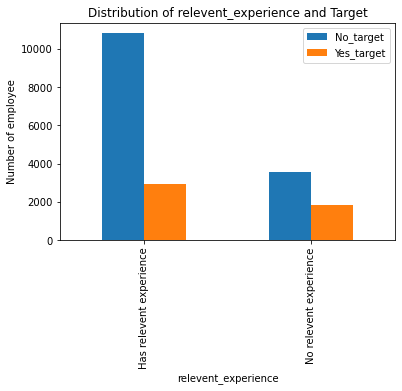

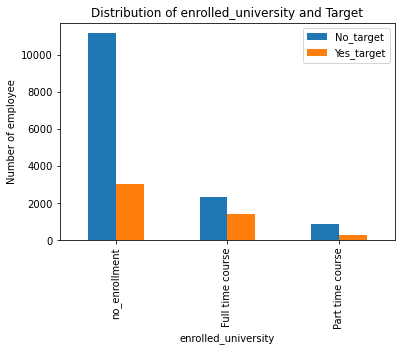

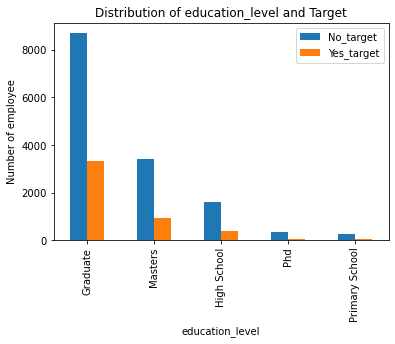

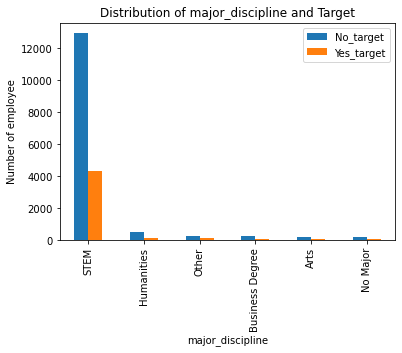

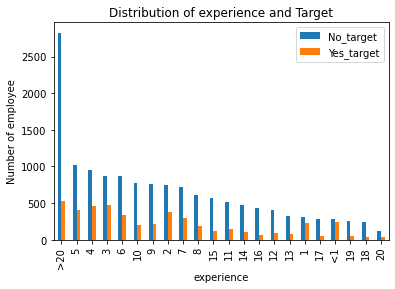

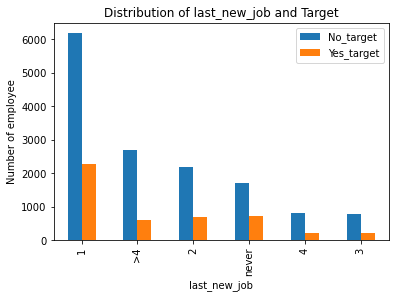

In [39]:
for i in col_obj:
    plot_bar(i)

In [69]:
def perbandingan(column):
    # count categorical values
    no = df[df['target'] == 0.0][column].value_counts()
    yes = df[df['target'] == 1.0][column].value_counts()
    count = no/yes
    category = pd.DataFrame(count)
    categoryy = category.sort_values(by=[column])
    print (categoryy)

In [70]:
col_obj= list(df.select_dtypes(['object']).columns.drop(['company_size','company_type']))

In [71]:
for i in col_obj:
    perbandingan(i)
    print('\n###########')

              city
city_139  0.250000
city_155  0.272727
city_42   0.444444
city_107  0.500000
city_33   0.545455
...            ...
city_2         NaN
city_39        NaN
city_62        NaN
city_8         NaN
city_82        NaN

[123 rows x 1 columns]

###########
          gender
Female  2.797546
Other   2.820000
Male    3.028403

###########
                         relevent_experience
No relevent experience              1.954846
Has relevent experience             3.657886

###########
                  enrolled_university
Full time course             1.625437
Part time course             2.966887
no_enrollment                3.665900

###########
                education_level
Graduate               2.600478
Masters                3.664171
High School            4.119289
Phd                    6.137931
Primary School         6.512195

###########
                 major_discipline
Other                    2.735294
Business Degree          2.802326
STEM                     2.987327


Kesimpulan:

* city X Target :
>* orang yang berasal dari city_139 lebih cenderung bekerja di perusahaan yang mengadakan training dibandingkan yang berasal dari city yang lain
* gender X Target:
>*  jika dilihat dari perbandingan, laki-laki lebih cenderung tidak bekerja di perusahaan yang menyediakan training dibandingkan wanita
* relevent_experience X Target:
>* orang yang memiliki relevant experience lebih cenderung tidak bekerja di perusahaan yang telah mengadakan training dibandingkan yang tidak memiliki relevant experience. hal ini bisa disebabkan karna yang memiliki relevant experience dalam mengikuti training hanya ingin mengasah ilmu/menambah wawasan sedangkan yang tidak memiliki relevant experience mengikuti training karna memang mencari pekerjaan.
* enrolled_university X Target :
>* orang yang berasal dari no enrollment university lebih cenderung tidak bekerja diperusahaan training dibandingkan part time ataupun fulltime course, namun full time course lebih cenderung bekerja di perusahaan training, hal ini bisa disebabkan karna orang-orang yang full time course ingin langsung bekerja setelh kelulusan dan mencari pekerjaan dengan mengikuti training
* education_level X Target :
>* Graduate lebih cenderung bekerja di perusahaan training dibandingkan education level yang lain, hal ini bisa disebabkan karena orang yang baru lulus memang lebih membutuhkan pekerjaan dan mengambil segala kesempatan pekerjaan yang ada. sedangkan master biasanya telah nyaman dengan tempat sebelumnya, sehingga enggan untuk pindah perusahaan.
dan untuk High School, Phd,Primary School masih belum siap untuk masuk kedunia kerja, mengikuti training hanya untuk menambah ilmu
* major_discipline X Target :
>* Jurusan yang paling cenderung bekerja di perusahaan dibandingkan jurusan lain adalah jurusan S1 bisnis dan lainnya, jurusan lainnya disini kemungkinan gabungan dari beberapa jurusan yang belum terdaftar di perusahaan. dan jurusan bisnis memang berkaitan dengan data science.
* experience X Target :
>* orang yang memiliki sedikit pengalaman lebih cenderung bekerja diperusahaan training dibandingkan yang memiliki pengalaman kerja yang lebih lama. hal ini bisa disebabkan karena yang memiliki sedikit pengalaman masih mencari tempat yang nyaman dan sesuai untuk bekerja. namun blm bisa dijadikan sebagai parameter kuat karna data antara experience dengan perbandingan tidak linier
* Last New Job :
>* orang yang tidak ada jarak waktu antara perusahaan baru dan lama bisa dikatakan orang yang tidak pernah menganggur lebih cenderung bekerja di perusahaan training, hal ini bisa disebabkan karna orang dengan typikal tsb selalu mengambil kesempatan dan mungkin didorong juga oleh faktor kebutuhan pribadi. sedangkan orang yang pernah menganggur biasanya lebih santai tidak mengambil pekerjaan di perusahaan training karna mungkin tidak ada tanggungan/desakan kebutuhan pribadi

**SUMMARY**

Dari beberapa insight diatas bisa digunakan untuk mengambil keputusan dalam mengadakan training baik pemerataan demografi peserta atuapun syarat peserta yang bisa mengikuti pelatihan.
misalkan perusahaan ingin mempekerjakan orang yang memang memiliki pengalaman tinggi namun terkendala dengan probabilitas mereka menolak(hanya mengikuti training) hal ini bisa diatasi dengan memberikan treatment khusus kepada orang yang telah memiliki pengalaman tinggi pada saat training.

# **MachineLearning**

**Data**

In [76]:
df

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83,0.0
3,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,50-99,Pvt Ltd,1,42,1.0
19154,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,4,52,1.0
19155,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,STEM,<1,500-999,Pvt Ltd,2,97,0.0


Target data merupakan clasifikasi(1,0) maka akan menggunakan metode Classifikasi dari Supervised Learning

**Missing Value,Outlier,Balancing Data**

* Missing Value telah di isi pada saat EDA 
* outlier masih dibawh 10% sehingga bisa menggunakan metode yang sensitif terhadap outlier.
* Terdapat indikasi **Imbalance** data, jadi jika accuracy masih rendah/belum memuaskan, data akan di balancing.

**Analysis**

* *0 = hanya ikut training*
* *1 = bekerja di perusahaan training*

        - TN: orang-orang yang diprediksi hanya ikut training dan actualnya memang hanya mengikuti training
        - TP: orang-orang yang diprediksi bekerja setelah ikut training dan actualnya memang bekerja setelah ikut training
        - FP: orang-orang yang diprediksi akan bekerja diperusahaan training tapi actualnya tidak
        - FN: orang-orang yang diprediksi hanya ikut training tapi actualnya bekerja diperusahaan setelah training.

Tindakan:
* FP: Salah prediksi, perusahaan rugi karna telah mengeluarkan biaya,waktu dan harus training ulang jika kuota pegawai belum memenuhi
* FN: salah prediksi, Perusahaan tidak rugi 

- > Yang akan di tekan adalah FP , maka mencari model dengan nilai precision yang paling baik

**Preprocessing**

*Processing scheme :*

* OneHot : gender,relevent_experience,enrolled_university,education_level,major_discipline,last_new_job.
* Binary : city,experience
* Passthrough : city_development_index,training_hours

In [87]:
transformer = ColumnTransformer([
    ('one hot',OneHotEncoder(drop='first'),['gender','relevent_experience','enrolled_university','education_level','major_discipline','last_new_job']),
    ('binary',ce.BinaryEncoder(),['city','experience']),
    ('scaler',RobustScaler(),['city_development_index','training_hours'])
],remainder='passthrough')


**Data Splitting**

In [88]:
X=df.drop(['company_size','company_type'],axis=1)
y=df['target']

In [90]:
X.shape

(19158, 11)

In [91]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.3,random_state=1111)

**Modelling**

*Define Model*

In [93]:
logreg = LogisticRegression()
tree = DecisionTreeClassifier(random_state = 1111)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state = 1111)

*Modelling*

In [94]:
logreg_pipe = Pipeline([
    ('transform',transformer),
    ('logreg',logreg)
])

tree_pipe= Pipeline([
    ('transform',transformer),
    ('tree',tree)
])

knn_pipe =Pipeline([
   ('transform',transformer),
    ('knn',knn)
])

rf_pipe = Pipeline([
    ('transform',transformer),
    ('rf',rf)
])

**Cross Validation**

In [95]:
def model_evaluation(model, metric):
    skfold = StratifiedKFold(n_splits = 5)
    model_cv = cross_val_score(model, X_train, y_train, cv = skfold, scoring = metric)
    return model_cv

In [96]:
logreg_pipe_cv = model_evaluation(logreg_pipe, 'precision')
tree_pipe_cv = model_evaluation(tree_pipe, 'precision')
knn_pipe_cv = model_evaluation(knn_pipe, 'precision')
rf_pipe_cv = model_evaluation(rf_pipe, 'precision')

In [97]:
for model in [logreg_pipe, tree_pipe, knn_pipe, rf_pipe]:
    model.fit(X_train, y_train)

In [101]:
score_mean = [logreg_pipe_cv.mean(), tree_pipe_cv.mean(), knn_pipe_cv.mean(),
              rf_pipe_cv.mean()]
score_std = [logreg_pipe_cv.std(), tree_pipe_cv.std(), knn_pipe_cv.std(),
             rf_pipe_cv.std()]
score_precision_score = [precision_score(y_test, logreg_pipe.predict(X_test)),
            precision_score(y_test, tree_pipe.predict(X_test)), 
            precision_score(y_test, knn_pipe.predict(X_test)), 
            precision_score(y_test, rf_pipe.predict(X_test))]
method_name = ['Logistic Regression', 'Decision Tree Classifier',
              'KNN Classifier', 'Random Forest Classifier']
cv_result = pd.DataFrame({
    'method': method_name,
    'mean score': score_mean,
    'std score': score_std,
    'precision score': score_precision_score
})
cv_result

,method,mean score,std score,precision score
0,Logistic Regression,1.000000,0.000000,1.000000
1,Decision Tree Classifier,1.000000,0.000000,1.000000
2,KNN Classifier,0.985543,0.003478,0.991817
3,Random Forest Classifier,1.000000,0.000000,1.000000


Peforma model sangat bagus, sebenarnya bisa hanya sampai sini karna telah mendapatkan model dengan nilai precision yang tinggi.
namun akan dicoba untuk balancing data serta tunning model untuk mendaptkan model yang paling stabil

**Imbalance Dataset**

*UnderSamping*

In [104]:
rus = RandomUnderSampler(random_state =1111)
X_under, y_under = rus.fit_resample(X_train, y_train) 

In [105]:
logreg_pipe_under = Pipeline([
    ('transform',transformer),
    ('rus',rus),
    ('logreg',logreg)
])

tree_pipe_under = Pipeline([
    ('transform',transformer),
    ('rus',rus),
    ('tree',tree)
])

knn_pipe_under = Pipeline([
    ('transform',transformer),
    ('rus',rus),
    ('knn',knn)
])

rf_pipe_under = Pipeline([
    ('transform',transformer),
    ('rus',rus),
    ('rf',rf)    
])

In [106]:
def model_evaluation(model, metric):
    skfold = StratifiedKFold(n_splits = 5)
    model_cv = cross_val_score(model, X_under, y_under, cv = skfold, scoring = metric)
    return model_cv

logreg_under_cv = model_evaluation(logreg_pipe_under, 'precision') 
tree_under_cv = model_evaluation(tree_pipe_under, 'precision')
knn_under_cv = model_evaluation(knn_pipe_under, 'precision')
rf_under_cv = model_evaluation(rf_pipe_under, 'precision')

In [107]:
for model in [logreg_pipe_under, tree_pipe_under, knn_pipe_under, rf_pipe_under]:
    model.fit(X_train, y_train)

In [108]:
score_mean = [logreg_under_cv.mean(), tree_under_cv.mean(), knn_under_cv.mean(),
              rf_under_cv.mean()]
score_std = [logreg_under_cv.std(), tree_under_cv.std(), knn_under_cv.std(),
             rf_under_cv.std()]
score_precision_score = [precision_score(y_test, logreg_pipe_under.predict(X_test)),
            precision_score(y_test, tree_pipe_under.predict(X_test)), 
            precision_score(y_test, knn_pipe_under.predict(X_test)), 
            precision_score(y_test, rf_pipe_under.predict(X_test))]
method_name = ['Logistic Regression UnderSampling', 'Decision Tree Classifier UnderSampling',
              'KNN Classifier UnderSampling', 'Random Forest Classifier UnderSampling']
under_result = pd.DataFrame({
    'method': method_name,
    'mean score': score_mean,
    'std score': score_std,
    'precision score': score_precision_score
})
under_result

,method,mean score,std score,precision score
0,Logistic Regression UnderSampling,1.000000,0.000000,1.00000
1,Decision Tree Classifier UnderSampling,1.000000,0.000000,1.00000
2,KNN Classifier UnderSampling,0.954344,0.007499,0.88464
3,Random Forest Classifier UnderSampling,1.000000,0.000000,1.00000


pada saat balancing dataset, ternyata performa masih stabil, sehingga tidak perlu melakukan tunning
dan untuk model dipilih Logistic regresion dibandingkan Decision tree maupun random forest karena logreg memiliki sifat lebih stabil dibandingkan decision tree maunpun random forest yang mudah mengalami overfitting.